<a href="https://colab.research.google.com/github/AfeesAshraf/Car_Price_Prediction_Capstone_Project/blob/main/Car_Price_Prediction_Project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.metrics import r2_score,mean_squared_error

from scipy.stats import boxcox

import xgboost as xgb

import math

from joblib import dump, load


import warnings
warnings.filterwarnings('ignore')

Setting Display Max columns and display max rows to None so that it displays all the rows and columns which will help us in initial analysis

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

Importing the dataset

In [3]:
car_df = pd.read_csv("cars_price.csv")

#**Basic Understanding of Data**

In [4]:
car_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


1. Checking the dimensions of the data

In [5]:
car_df.shape

(205, 26)

Observation

1. From the above output we can say that there are 205 rows/records and 26 columns/Features present in our dataset.

2. Descriptive Statistics Analysis.

In [6]:
car_df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


3. Replacing the question marks with Null value.

In [7]:
car_df.replace('?', pd.NA, inplace=True)

4. Checking the basic information of dataset

In [8]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Observation

1. From above output we can observe that 16 categorical & 10 numerical Attributes.
2. All the features are not having correct data-types. So we have to correct them to correct data types.
3. There are Null values present in some columns. So they must be replaced and corrected. 

5. Checking NaN values in our Dataset

In [9]:
print(car_df.isnull().sum())

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


Observation:
1. We can see that 6 columns contain null values. 
2. 'Normalized-losses' feature has the most number of null values. 

We see that high number of NA Values are present in normalized-losses attribute.Dropping normalized-losses from car dataframe as it is not going to add value to our analysis

In [10]:
car_df = car_df.drop('normalized-losses',axis=1)

In [11]:
car_df.describe(include="all")

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,203,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,201,201,205.000000,203,203,205.000000,205.000000,201
unique,NaN,22,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,38,36,NaN,59,23,NaN,NaN,186
top,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,3.62,3.4,NaN,68,5500,NaN,NaN,8921
freq,NaN,32,185,168,114,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,23,20,NaN,19,37,NaN,NaN,2
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


# **Data Cleaning**
Filling/replacing Null values using Mean and Mode methods

In [12]:
car_df['bore'] = pd.to_numeric(car_df['bore'], errors='coerce')
mean=car_df["bore"].mean()
car_df["bore"]=car_df["bore"].fillna(value=mean)

In [13]:
car_df['stroke'] = pd.to_numeric(car_df['stroke'], errors='coerce')
mean=car_df["stroke"].mean()
car_df["stroke"]=car_df["stroke"].fillna(value=mean)

In [14]:
car_df['horsepower'] = pd.to_numeric(car_df['horsepower'], errors='coerce')
mean=car_df["horsepower"].mean()
car_df["horsepower"]=car_df["horsepower"].fillna(value=mean)

In [15]:
car_df['peak-rpm'] = pd.to_numeric(car_df['peak-rpm'], errors='coerce')
mode = car_df['peak-rpm'].mode().iloc[0]
car_df["peak-rpm"]=car_df["peak-rpm"].fillna(value=mode)

In [16]:
mode = car_df['num-of-doors'].value_counts().idxmax()
car_df['num-of-doors'].fillna(value=mode, inplace=True)

Instead of filling null values in the price feature, dropping remaining rows where there are null values. 

In [17]:
car_df.dropna(inplace=True)

Rechecking for Null values after cleaning

In [18]:
print(car_df.isnull().sum())

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


Observation

1. We can observe that none of the features is having Missing values.

Correcting datatypes for features.

In [19]:
factorCols = ['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
              'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']
car_df[factorCols] = car_df[factorCols].astype('category')

In [20]:
intCols = ['horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg','curb-weight', 'engine-size']
car_df[intCols] = car_df[intCols].astype(int)


In [21]:
floatCols = ['price']
car_df[floatCols] = car_df[floatCols].astype(float)

Re-checking the basic information of dataset

In [22]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          201 non-null    category
 1   make               201 non-null    category
 2   fuel-type          201 non-null    category
 3   aspiration         201 non-null    category
 4   num-of-doors       201 non-null    category
 5   body-style         201 non-null    category
 6   drive-wheels       201 non-null    category
 7   engine-location    201 non-null    category
 8   wheel-base         201 non-null    float64 
 9   length             201 non-null    float64 
 10  width              201 non-null    float64 
 11  height             201 non-null    float64 
 12  curb-weight        201 non-null    int64   
 13  engine-type        201 non-null    category
 14  num-of-cylinders   201 non-null    category
 15  engine-size        201 non-null    int64   
 16  fuel-sys

Observation:

1. All the features are having correct data-types. So we don't have to do any more changes

Re-checking the updated dimensions of the data

In [23]:
car_df.shape

(201, 25)

Observation:
1. From the above output we can say that there are 201 rows/records and 25 columns/Features present in our cleaned dataset.

In [24]:
car_df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Checking Duplicate Values.

In [25]:
car_df.duplicated().sum()

0

Observation

1. From the above output we can say that there are no duplicate records present in our dataset

Checking for unique values

In [26]:
car_df.nunique()

symboling              6
make                  22
fuel-type              2
aspiration             2
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            52
length                73
width                 43
height                49
curb-weight          169
engine-type            6
num-of-cylinders       7
engine-size           43
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            59
peak-rpm              22
city-mpg              29
highway-mpg           30
price                186
dtype: int64

Showing Only Categorical Features.

In [27]:
car_df.select_dtypes(include="category").head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


Showing only the Numerical Features

In [28]:
car_df.select_dtypes(include=["int","float"]).head()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Cleaning the CarName Feature

In [29]:
Company_Name = car_df["make"].apply(lambda x: x.split(" ")[0])
car_df.insert(2,"CompanyName",Company_Name)

# Now we can drop the CarName Feature.
car_df.drop(columns=["make"],inplace=True)

In [30]:
car_df.head()

,symboling,CompanyName,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [31]:
car_df["CompanyName"].unique()

['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', ..., 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']
Length: 22
Categories (22, object): ['alfa-romero', 'audi', 'bmw', 'chevrolet', ..., 'subaru', 'toyota', 'volkswagen',
                          'volvo']

# **Exploratory Data Analysis (EDA)**

1. Visualizing our Target Feature.

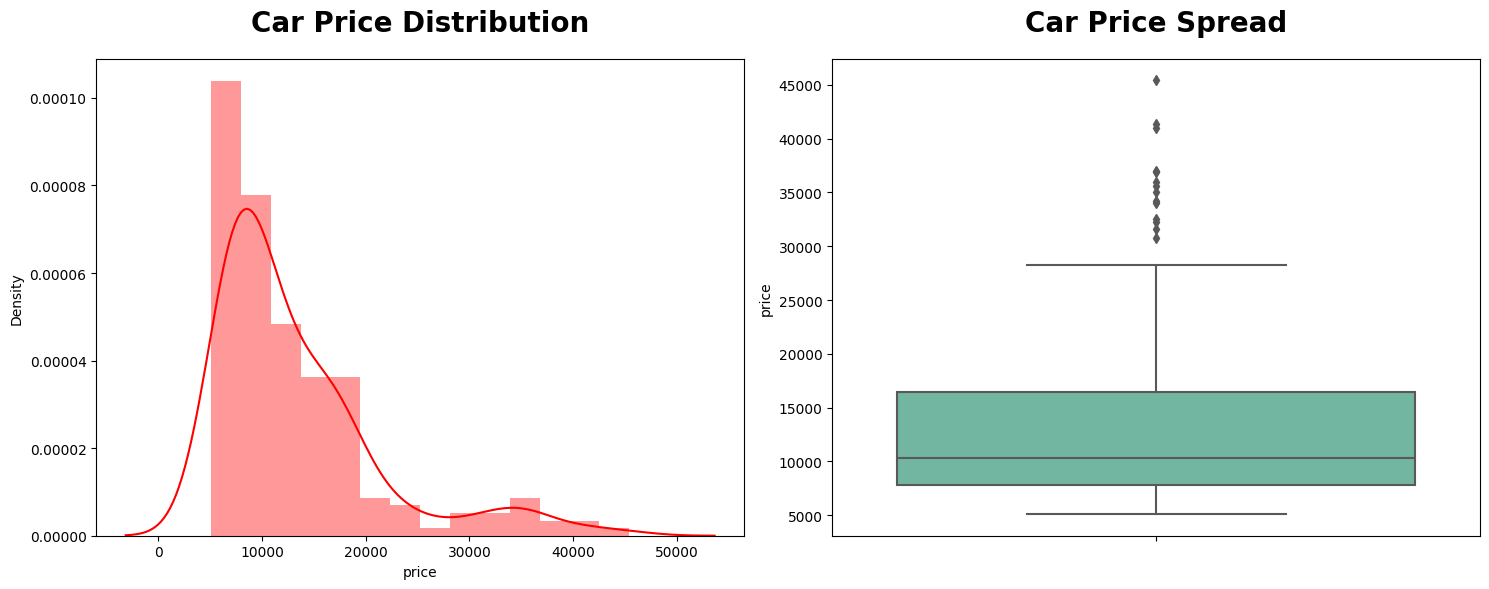

In [32]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(car_df["price"],color="red",kde=True)
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=car_df["price"],palette="Set2")
plt.title("Car Price Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

In [33]:
car_df["price"].agg(["min","mean","median","max","std","skew"]).to_frame().T

,min,mean,median,max,std,skew
price,5118.0,13207.129353,10295.0,45400.0,7947.066342,1.809675


Insights:

1. We can clearly observe that our Car Price Feature is Right Skewed.
2. We can clearly observe that there is a significant difference between mean & median value.
3. We can also make an insight that most of the car's price is below 14000.
4. We can also that the skewness of the car price is above 1.5 which means that the data points are highly spread.

2. Visualizing Total No. of cars sold by different company

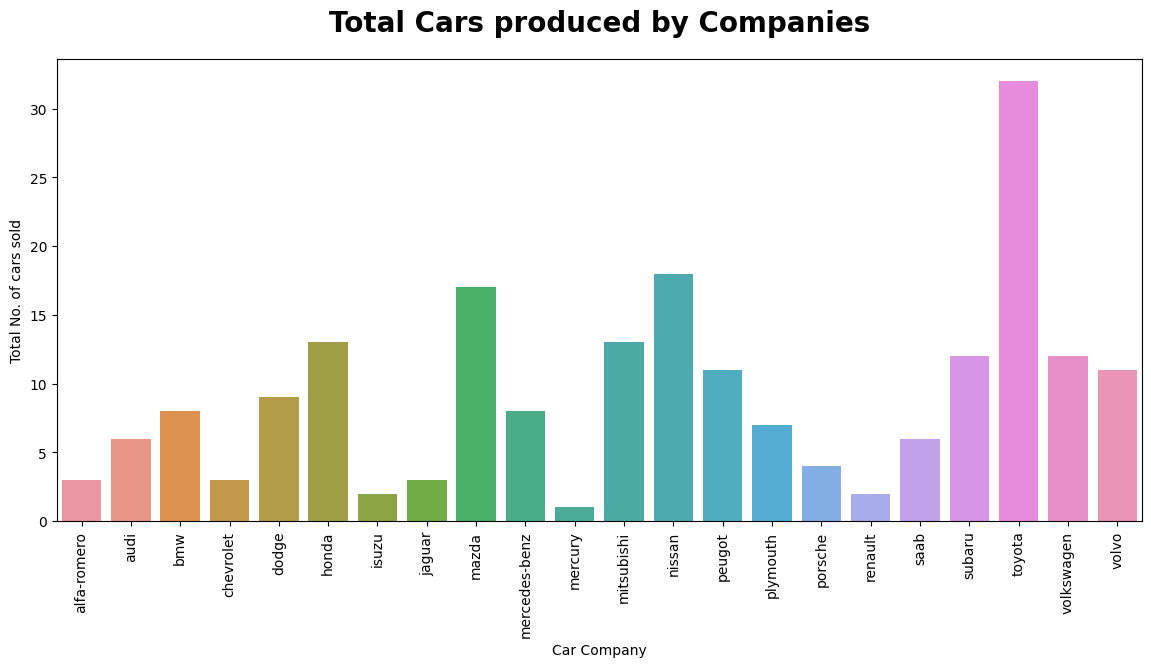

In [34]:
plt.figure(figsize=(14,6))
counts = car_df["CompanyName"].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Car Company")
plt.ylabel("Total No. of cars sold")
plt.title("Total Cars produced by Companies", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [35]:
car_df[car_df["CompanyName"]=="mercury"]

,symboling,CompanyName,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
75,1,mercury,gas,turbo,two,hatchback,rwd,front,102.7,178.4,68.0,54.8,2910,ohc,four,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503.0


In [36]:
car_df[car_df["CompanyName"]=="renault"]

,symboling,CompanyName,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,104,5500,23,31,9295.0
131,2,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.9,8.7,104,5500,23,31,9895.0


Insights

1. Toyota company has sold the highest number of cars.
2. So we can say that Toyota is kind of customers most favoured company.
Mercury or renault are having very low data-points. So we can't make any inference of least sold car companies.

3. Visualizing Car Company w.r.t Price

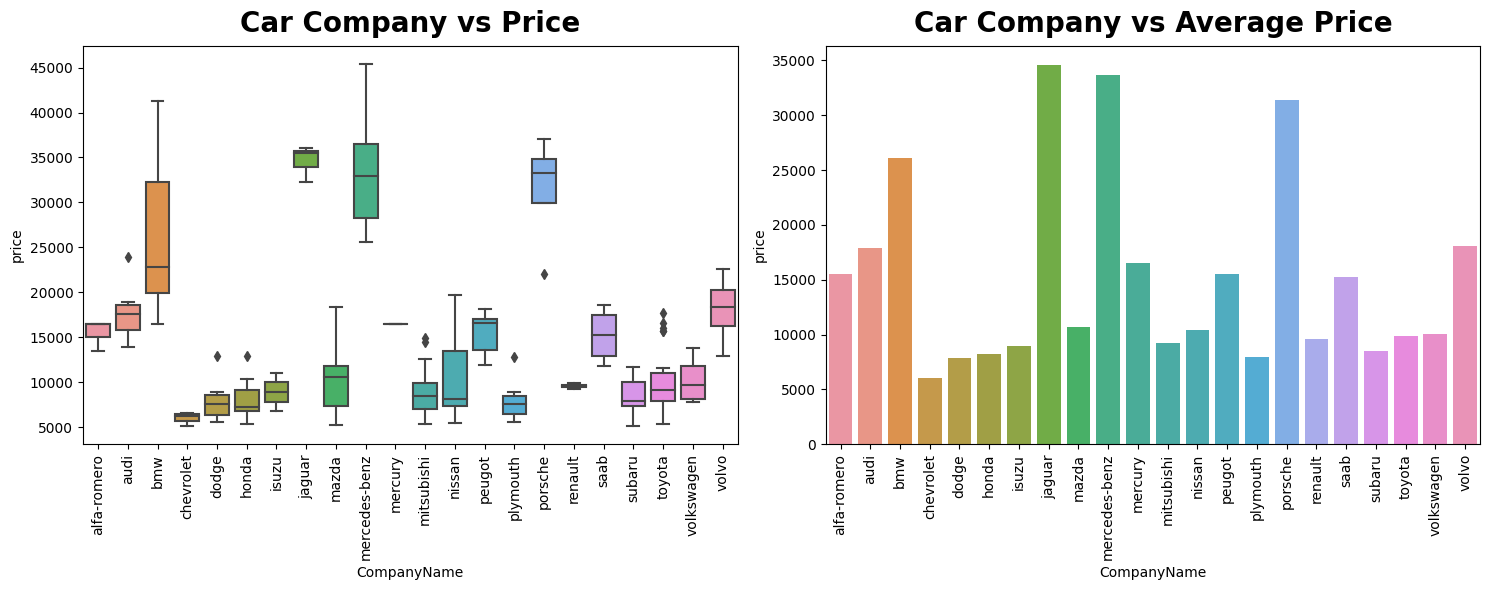

In [37]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x="CompanyName",y="price",data=car_df)
plt.xticks(rotation=90)
plt.title("Car Company vs Price", pad=10, fontweight="black", fontsize=20)

plt.subplot(1,2,2)
x = pd.DataFrame(car_df.groupby("CompanyName")["price"].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y="price",data=x) 
plt.xticks(rotation=90)
plt.title("Car Company vs Average Price", pad=10, fontweight="black", fontsize=20)
plt.tight_layout()
plt.show()

Insights

Jaguar & Mercedes-benz seems to have the highest price range cars.

Note

Since there are too many categories in car compnay feature. So we can derive a new feature Company Price Range which will show the price range as Low Range, Medium Range, High Range.

4. Visualizing Car Fuel Type Feature

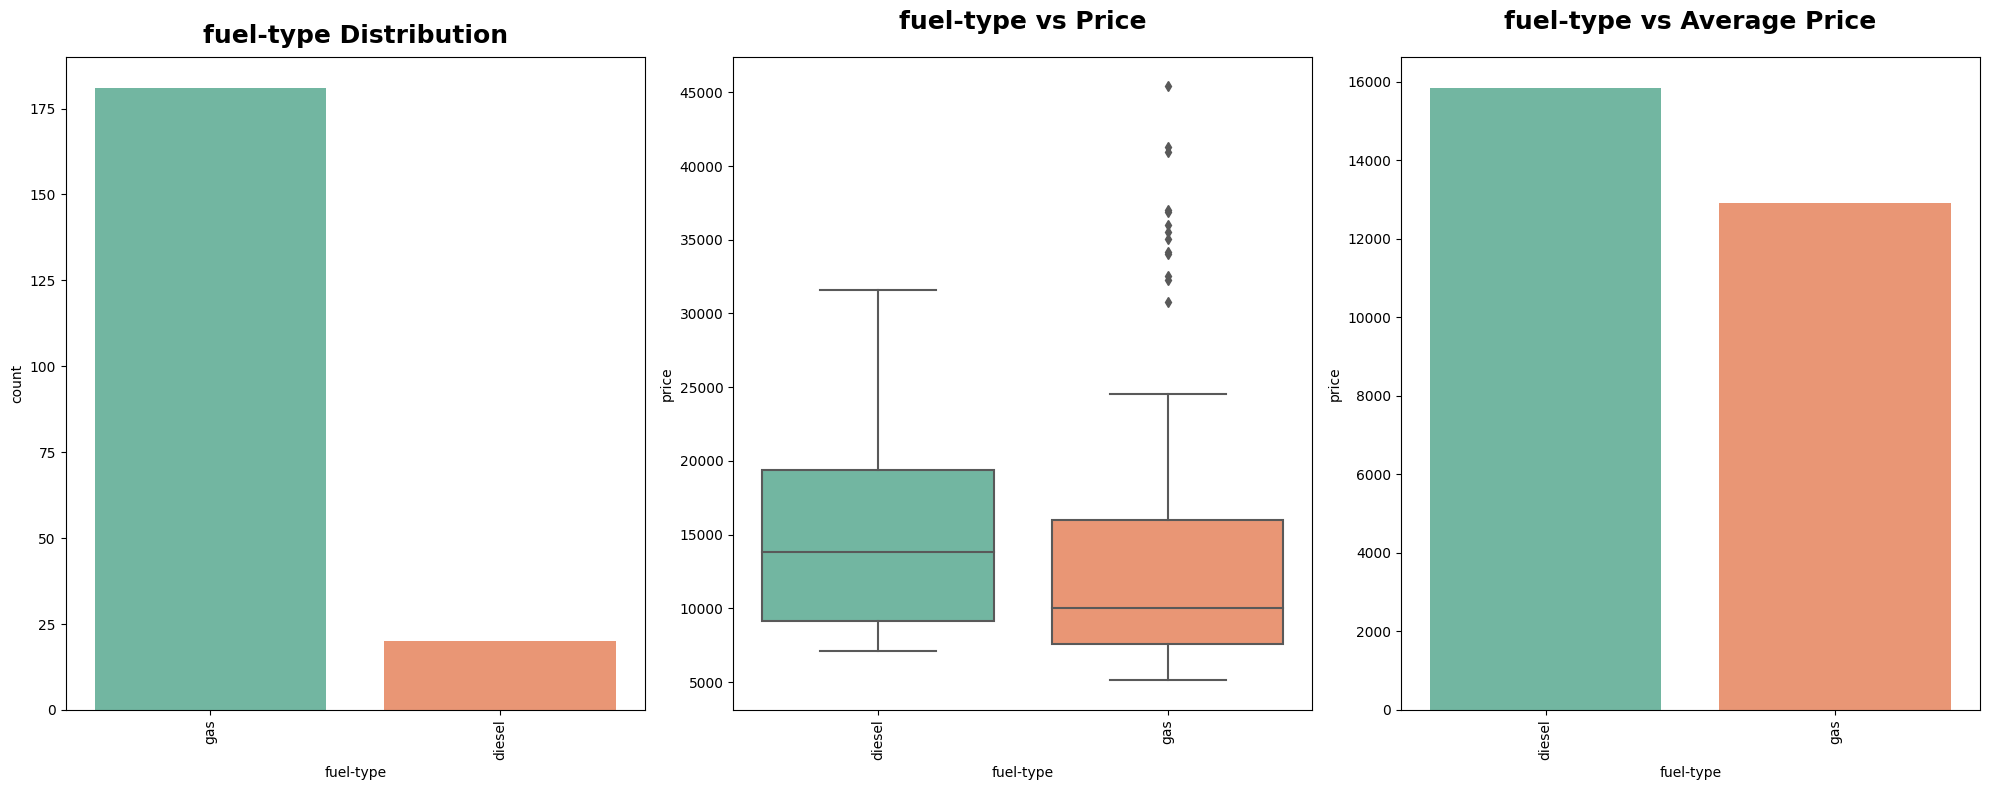

In [38]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=car_df,palette="Set2",order=car_df[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="price",data=car_df,palette="Set2")
    plt.title(f"{cols} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(car_df.groupby(cols)["price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="Set2")
    plt.title(f"{cols} vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

categorical_visualization("fuel-type")

Insights

1. We can clearly make an inisght that Cars having gas fuel system is mostly sold.
2. From the second plot we can make an insight that Gas Fuel Sysytem cars are availabe within every price range.
3. Both type of fuel cars are having most of the cars price near to average price of the cars. But the gas Fuel Type cars are having cars with high prices also.
4. From the third plot we can make an inisght that the Average price of gas fuel type cars are less than diesel fuel type cars.
5. So we can say that customers prefer those cars which consumes less price in fuels.

5. Visualizing Aspiration Feature

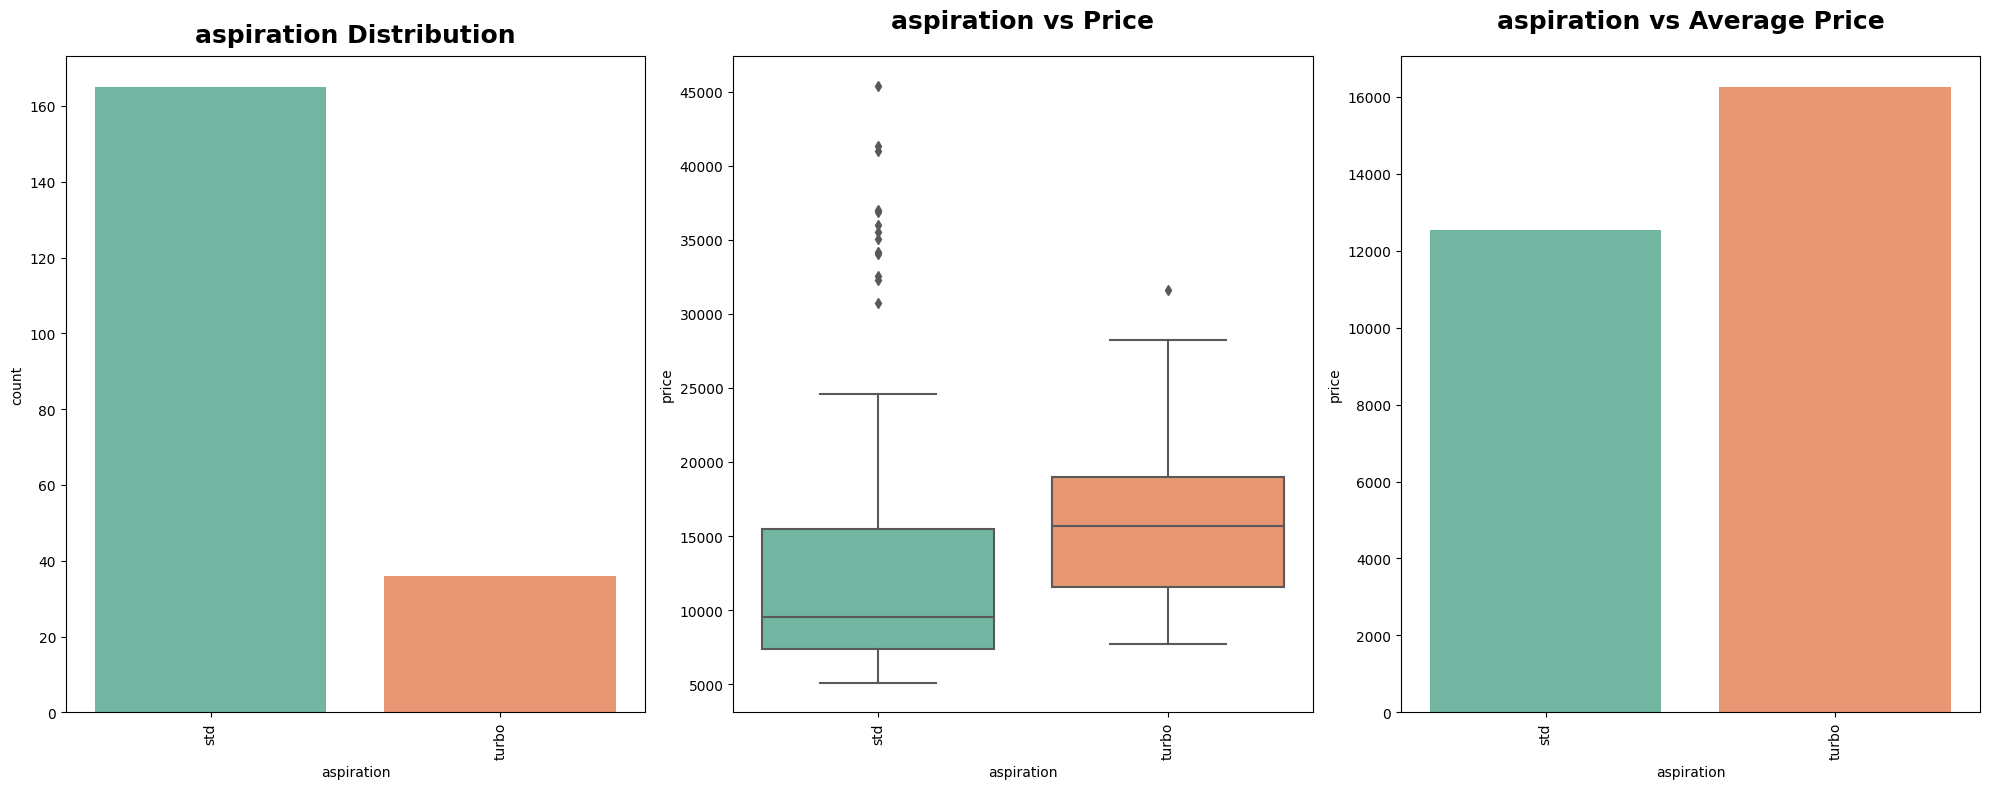

In [39]:
categorical_visualization("aspiration")

Observation

1. Cars having STD Aspiration are highly sold when compared with Turbo Aspiration.
2. Cars having Turbo Aspiration have higher price range than the STD Aspiration.

Insights

Outliers present in STD Aspiration states that some of the cars having std aspiration are expensive too.

6. Visualizing num-of-doors Feature.

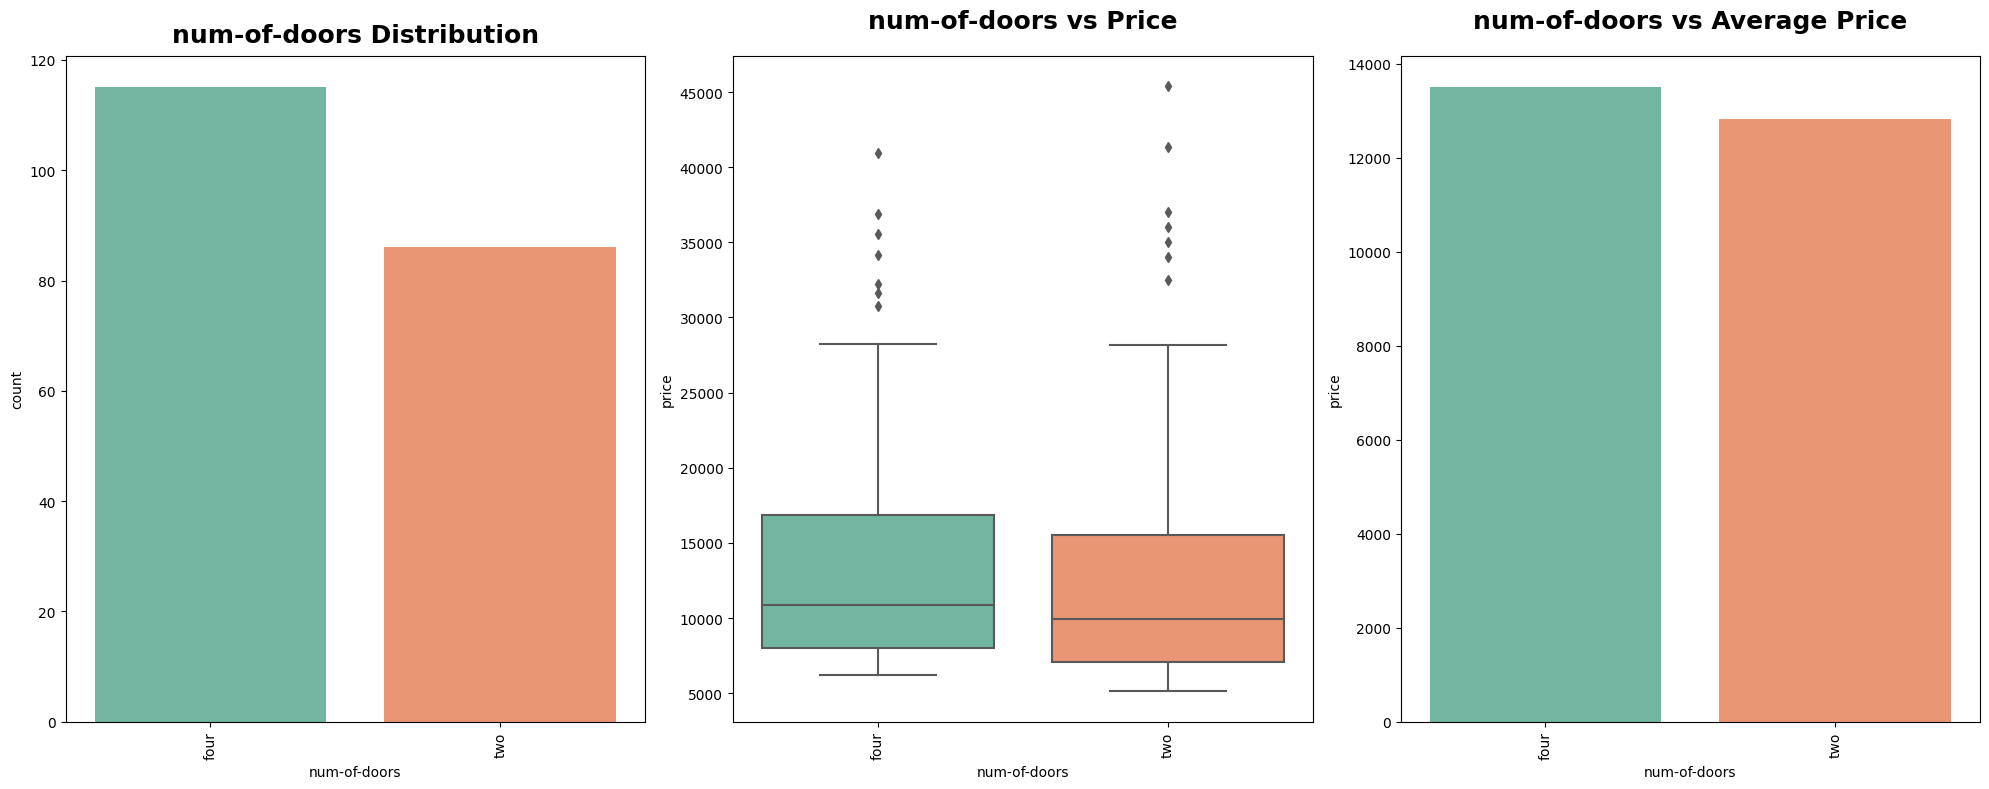

In [40]:
categorical_visualization("num-of-doors")

Observation

1. Cars having Four Doors are mostly sold when compared with cars having Two Doors.
2. Cars having Fours Doors are little more expensive when we compare the avergae price of cars having two doors or four doors.

Insights

1. Cars having Four Doors are mostly sold. But there's not a big difference between the sales of cars having four doors & two doors..
2. Outliers prsesent in two doors cars states that some of the cars are are more expensive than the cars having four doors
3. Door numbers category is not affecting the price that much

7. Visualizing Body style Feature

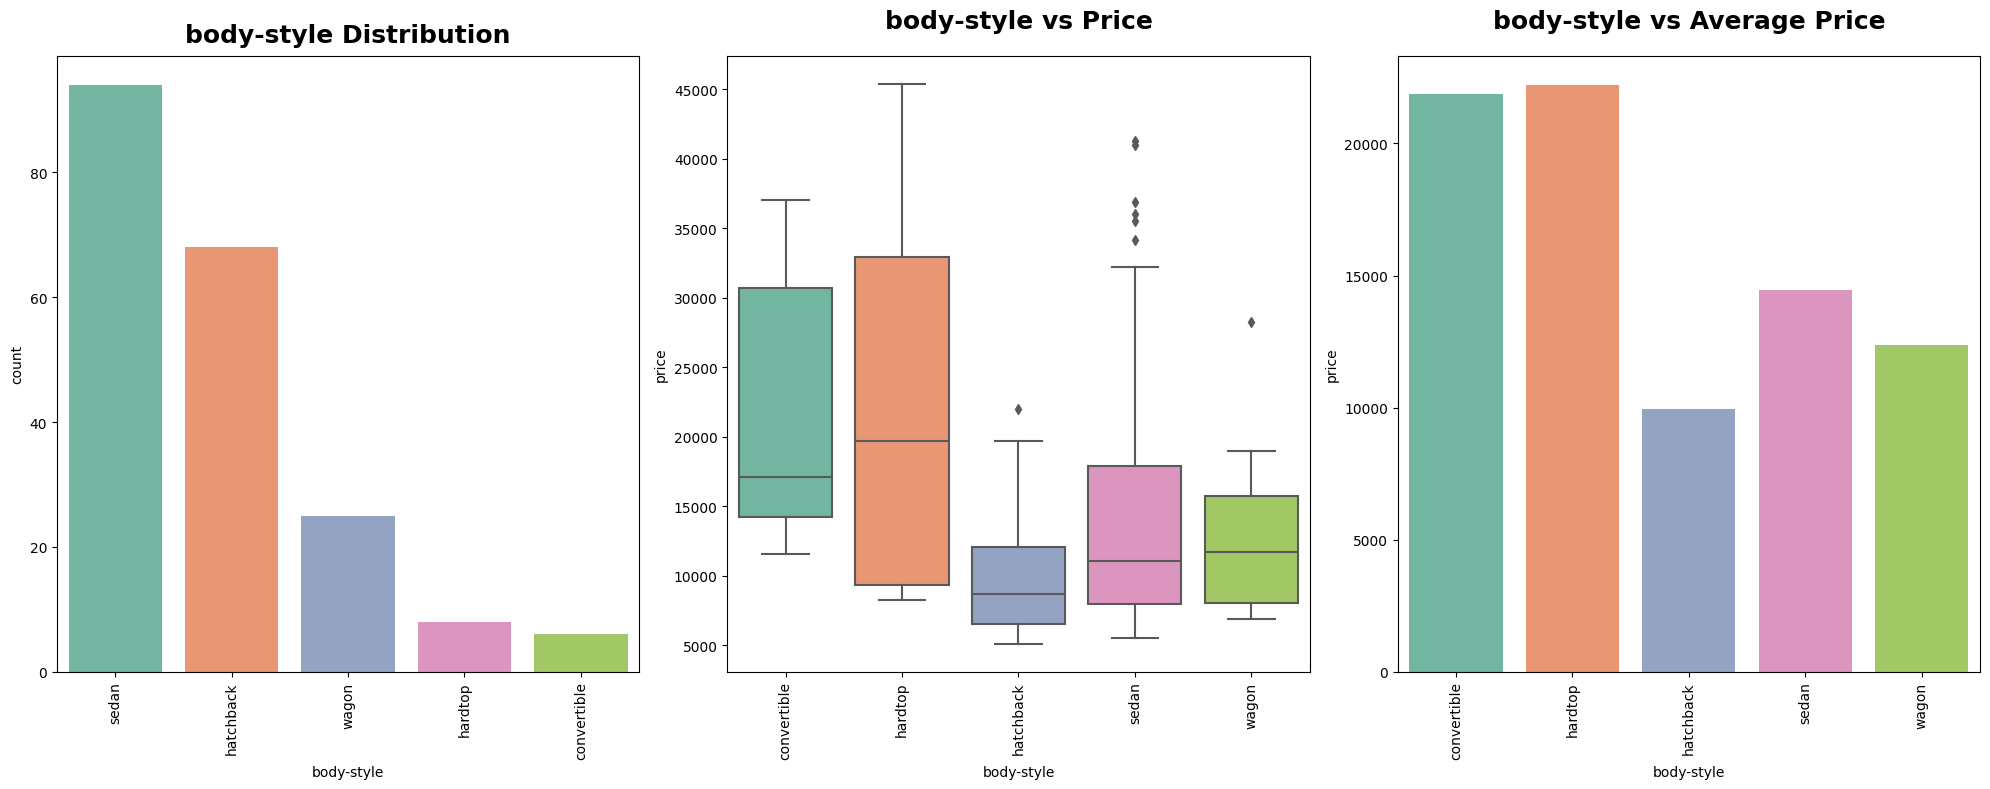

In [41]:
categorical_visualization("body-style")

Obseravtion

1. Cars having sedan body-style are mostly sold followed by hatchback.
2. Cars having convertible or hardtop body-type are less sold.
3. Cars having Hardtop body-type is the mostly expensive cars followed by convertible.

Insights

1. Convertible & Hardtop body-types are less sold because they are very expensive cars. So most of the customers couldn't prefer it.
2. Cars having Sedan body-type is the third most expensive car. But still its having the most number of car sales. So we can say customers prefer medium price range cars.

8. Visualizing Drive Wheel Feature

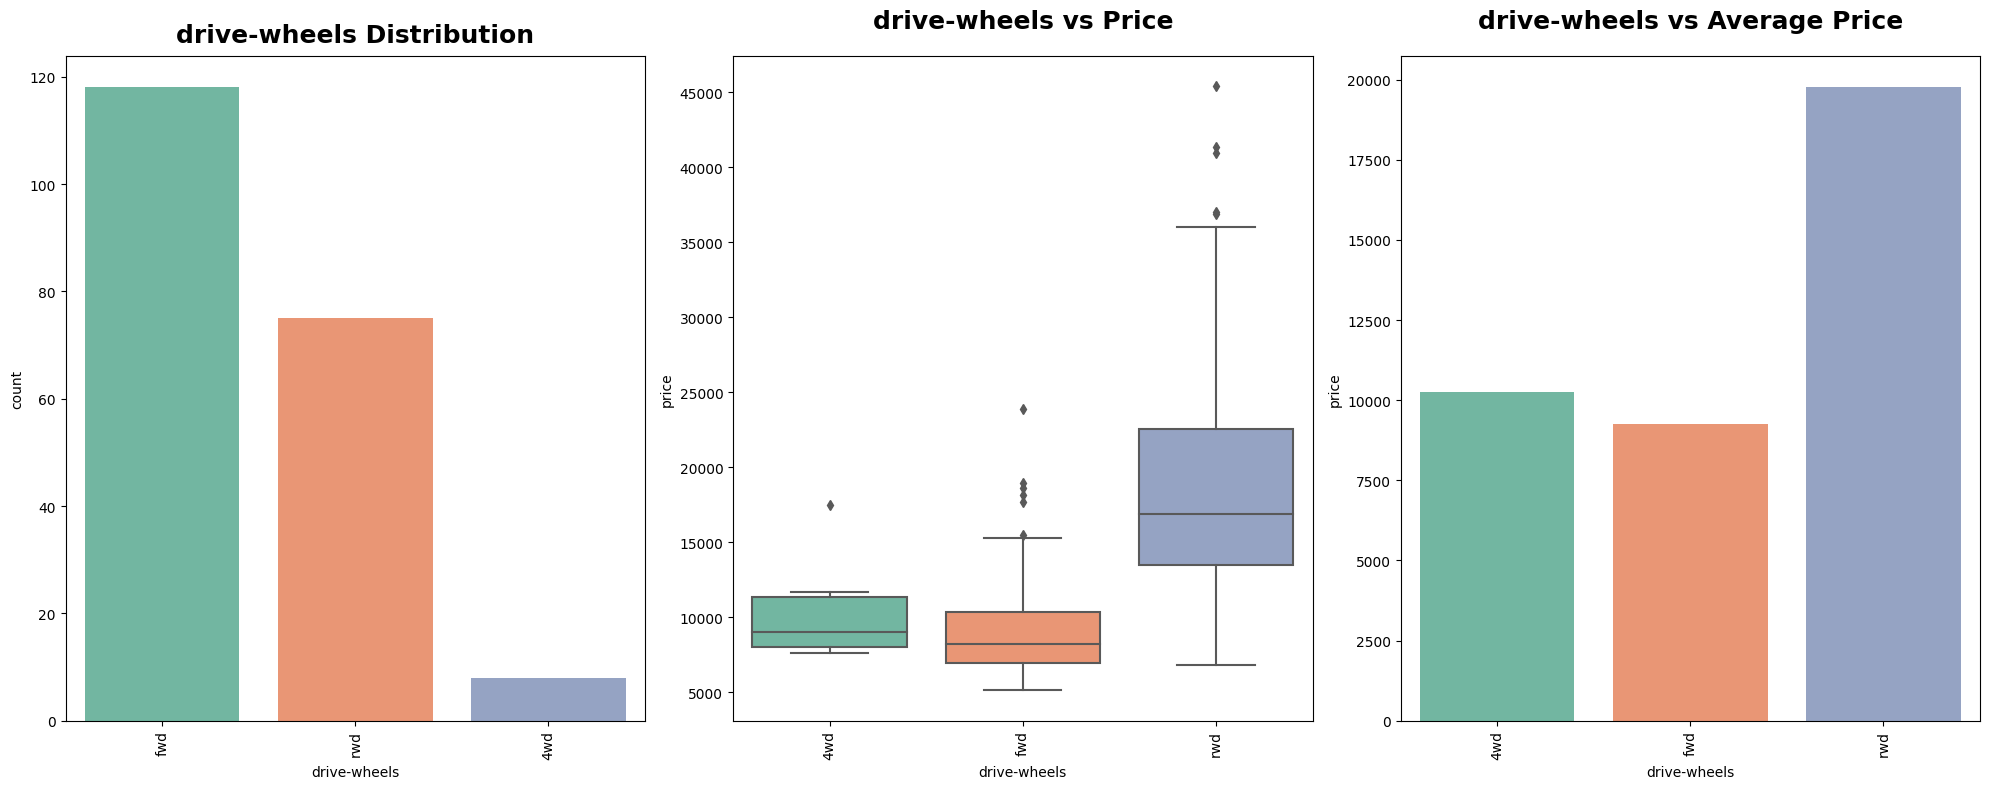

In [42]:
categorical_visualization("drive-wheels")

Observation

1. Most of the cars which are sold are having Front Wheel Drive (FWD) followed by Rear Wheel Drive (RWD).
2. Cars having Rear Wheel Drive are mostly expensive cars. But cars having Front Wheel Drive are the cheapest.

Insights

We can make an insight that the high rated cars must be using Rear Wheel Drive.
Cars with low prices must be using Forward Wheel Drive

9. Visualizing Engine Location Feature.

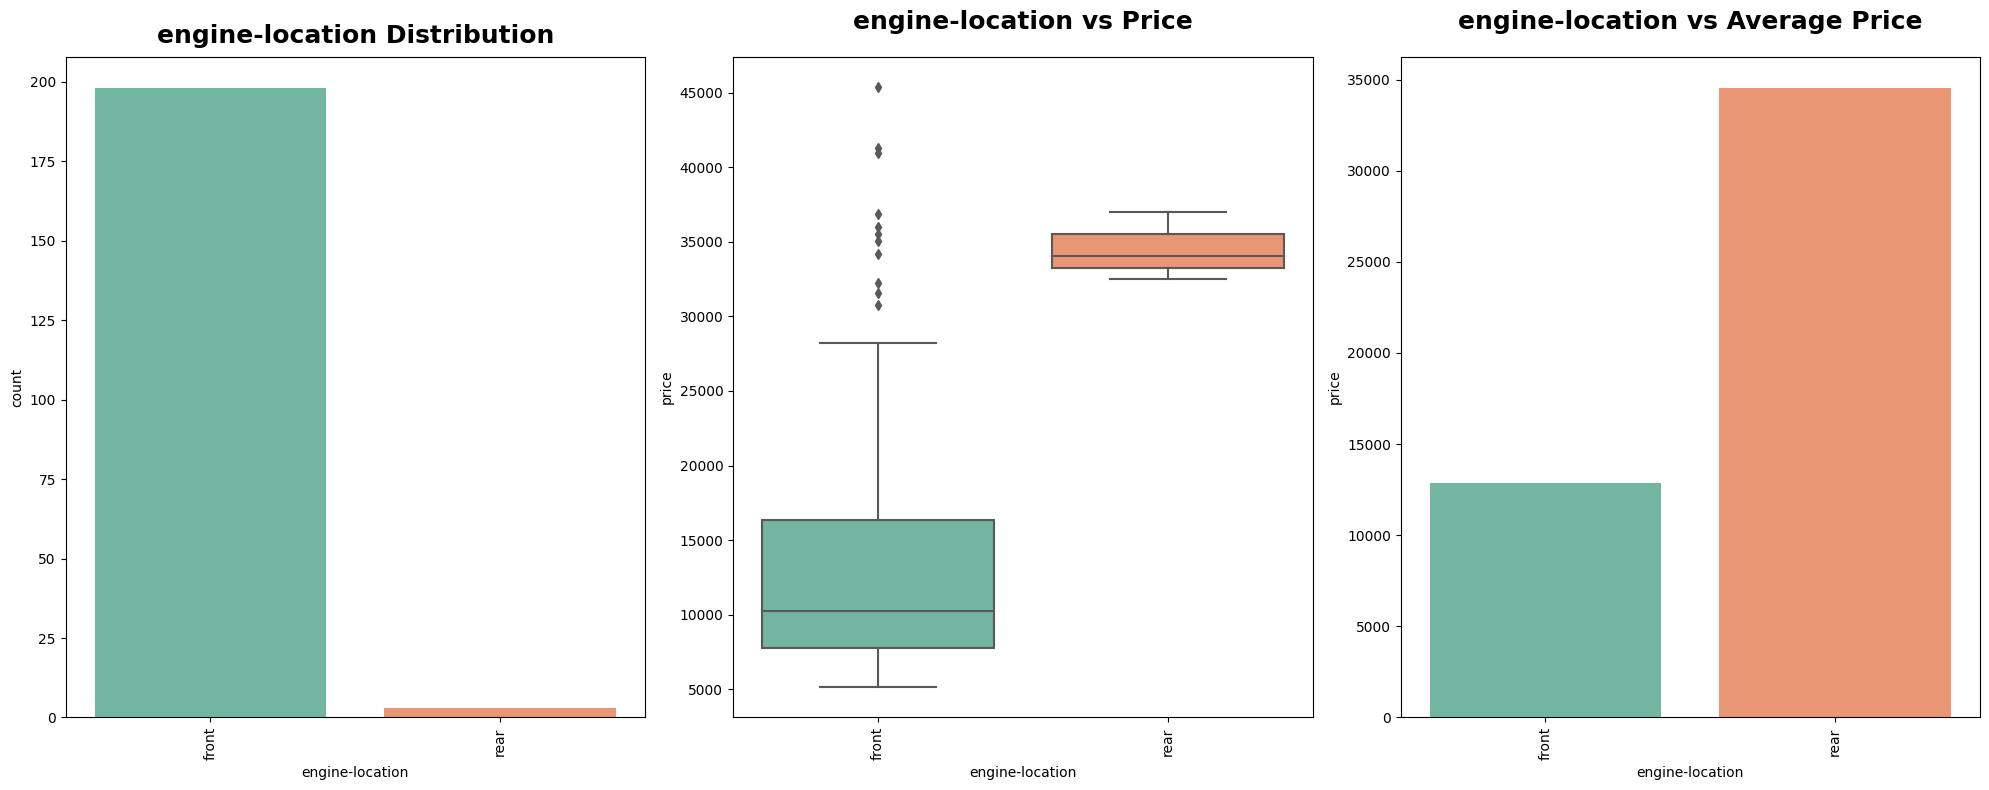

In [43]:
categorical_visualization("engine-location")

In [44]:
car_df[car_df["engine-location"]=="rear"]

,symboling,CompanyName,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
126,3,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,32528.0
127,3,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028.0
128,3,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028.0


Observation

Most of the cars are having engine location in front.
Insights

1. Note there are only 3 data-points for the rear category.
2. So we can't make any inference of car price when compared with engine location.
If we want we can drop this feature before training as it may lead to overfitting

10. Visualizing Engine Type Feature

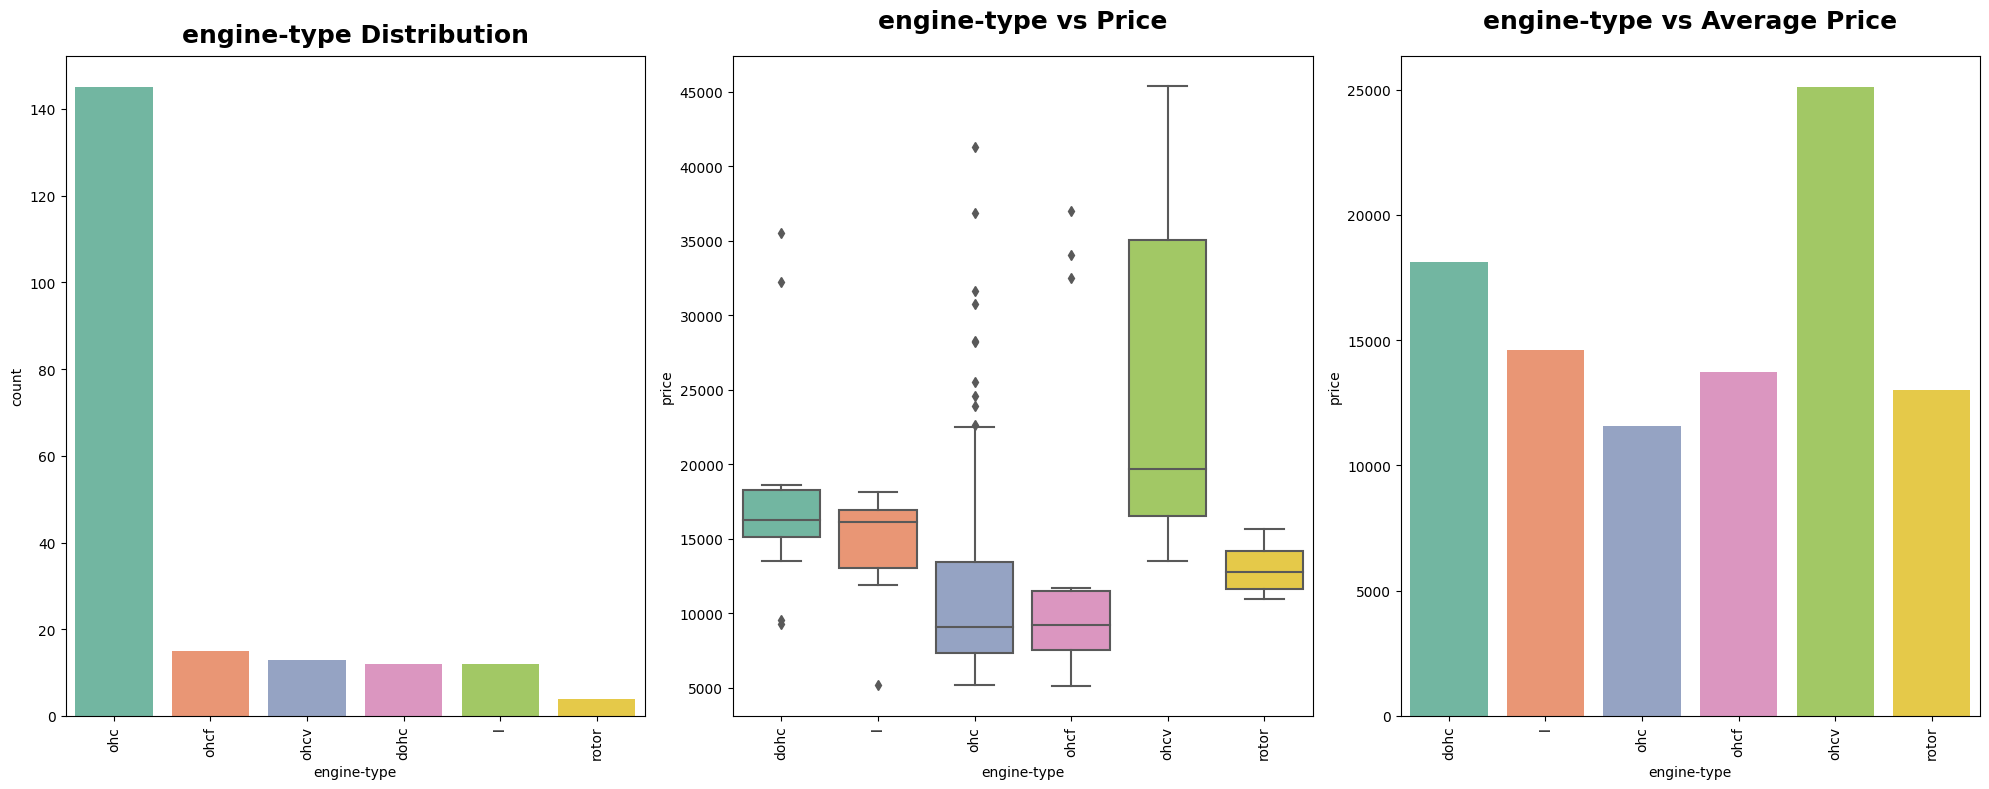

In [45]:
categorical_visualization("engine-type")

In [46]:
car_df[car_df["engine-type"]=="rotor"]

,symboling,CompanyName,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.329751,3.255423,9.4,101,6000,17,23,10945.0
56,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.329751,3.255423,9.4,101,6000,17,23,11845.0
57,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,3.329751,3.255423,9.4,101,6000,17,23,13645.0
58,3,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,3.329751,3.255423,9.4,135,6000,16,23,15645.0


Insights

1. Cars having Overhead Camshaft (OHC) engines are mostly sold.
2. There are very few data-points of engine type rotor. 
3. So we can say that cars having ohcv engine types are mostly expensive.
4. Cars hvaing Overhead Camshaft (OHC) engines are least expensive cars.

11. Visualizing Cyclinder Number Feature

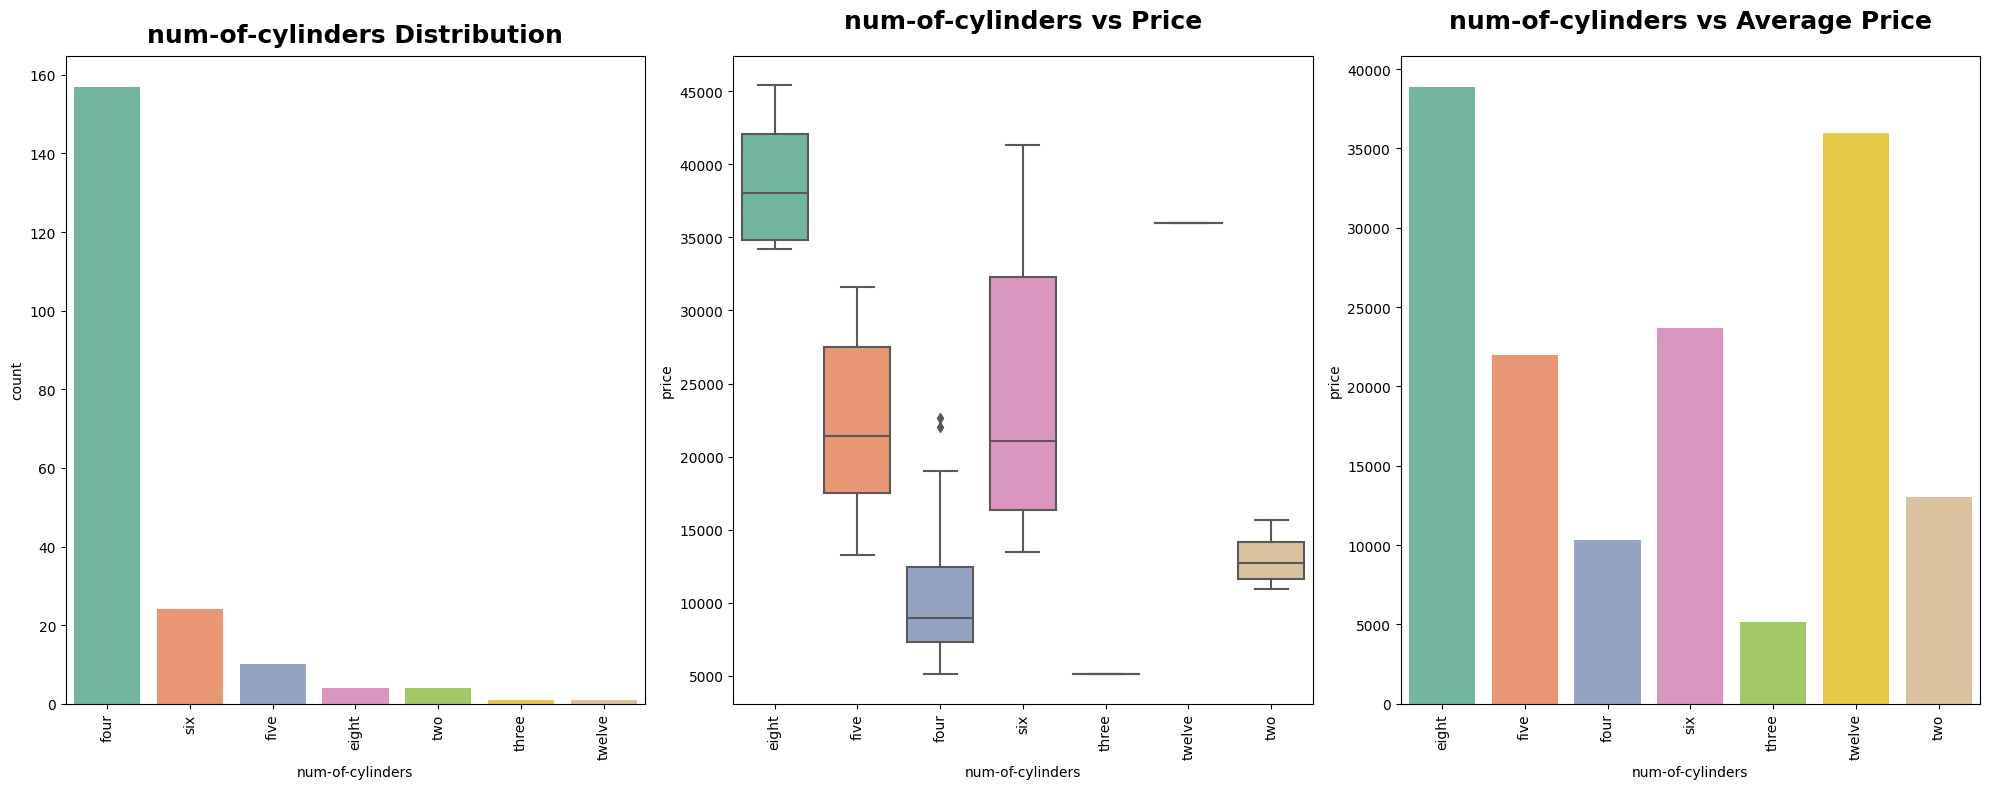

In [47]:
categorical_visualization("num-of-cylinders")

In [48]:
car_df[car_df["num-of-cylinders"]=="three"]

,symboling,CompanyName,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
18,2,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0


In [49]:
car_df[car_df["num-of-cylinders"]=="twelve"]

,symboling,CompanyName,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
49,0,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0


Insights

1. Most of the cars are having Four cyclinders followed by cars having six cyclinders.
2. There are only one data-point each for car having Three & Twelve data-points.
3. Cars having eight cyclinders are most expensive cars followed by twelve cyclinders.

12. Visualizing Fuel System Feature

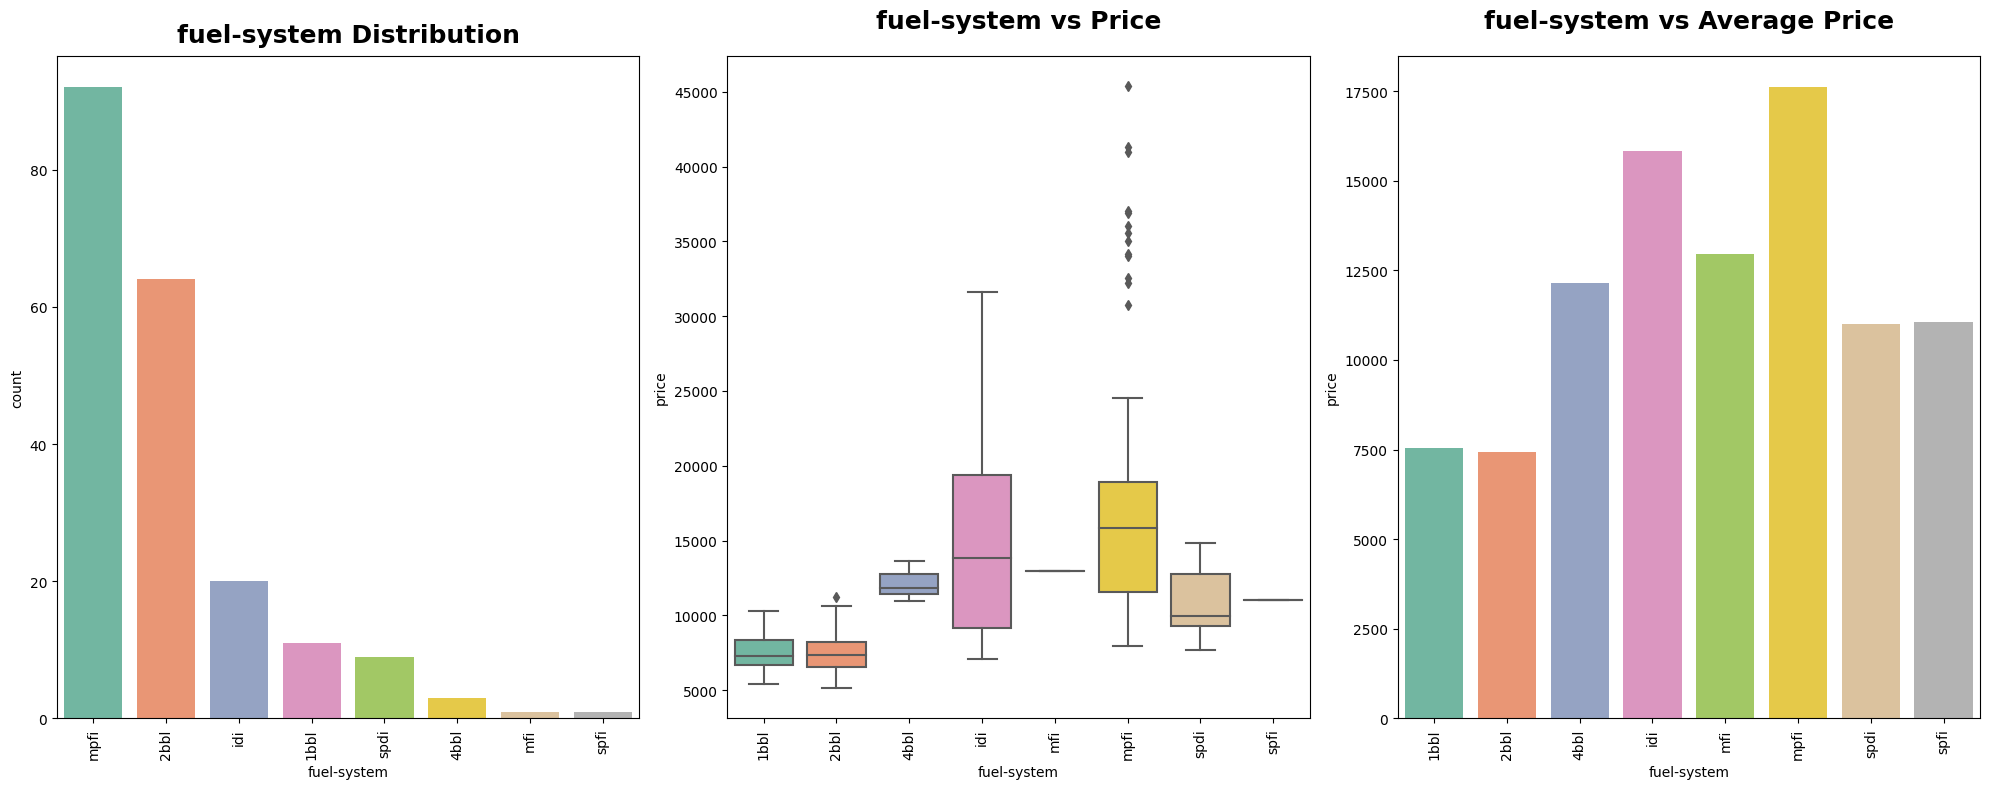

In [50]:
categorical_visualization("fuel-system")

In [51]:
car_df[car_df["fuel-system"]=="mfi"]

,symboling,CompanyName,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
29,3,dodge,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2811,ohc,four,156,mfi,3.6,3.9,7.0,145,5000,19,24,12964.0


In [52]:
car_df[car_df["fuel-system"]=="spfi"]

,symboling,CompanyName,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
46,2,isuzu,gas,std,two,hatchback,rwd,front,96.0,172.6,65.2,51.4,2734,ohc,four,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048.0


Insight

1. Most of the cars are having mpfi & 2bbl fuelsystems.
2. Cars having mpfi fuel system are the expensive cars followed by idi fuel system cars.
3. There are only one data-point for each mfi and spfi fuelsystem cars. So we can't make any further inference.

13. Visualizing Symboling Feature

The symboling represents the degree to which the car is riskier than its price suggests.
It ranges from -3 to +3, with higher negative values indicating higher risk and higher positive values indicating lower risk.
In other words, a car with a symboling of -3 is considered riskier than a car with a symboling of +3, and is likely to have a lower price as a result.

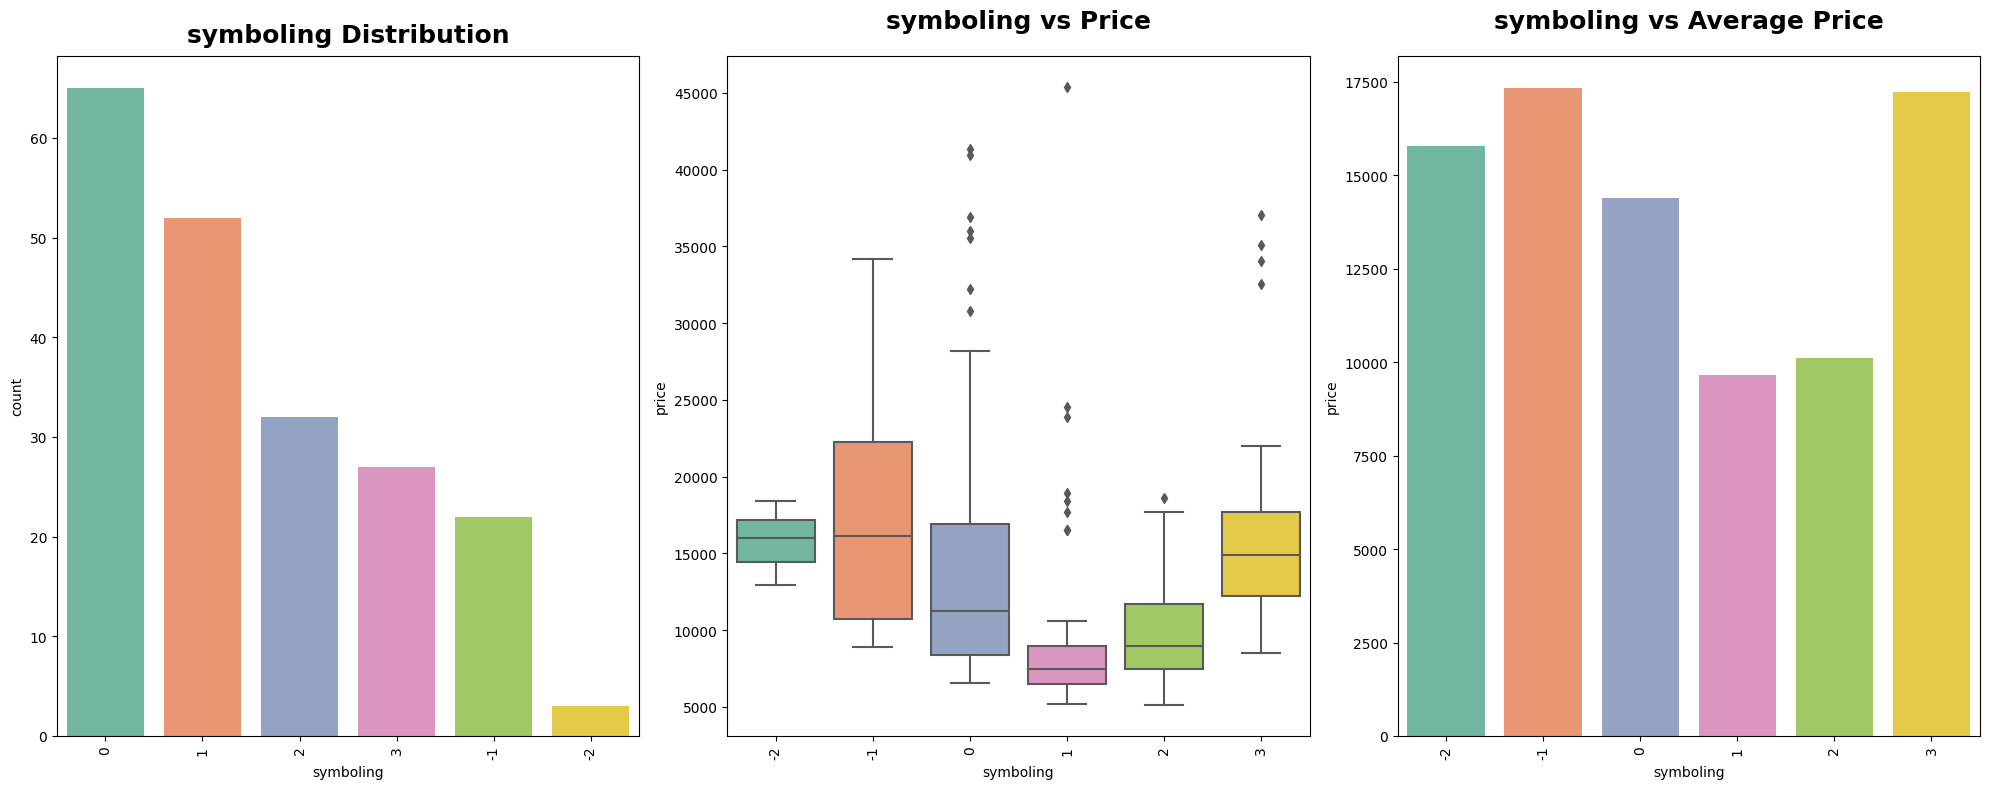

In [53]:
categorical_visualization("symboling")

Insights

1. We can clearly observe cars having symboling 0 or 1 are motly preferred.
2. We can aslo observe that symboling -1, 0, -2, 3 are expensive.

14. Visualizing "Length", "Width","height" Features w.r.t "Price".

In [54]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,3,x)
        sns.scatterplot(x=col,y="price",data=car_df,color="blue")
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1

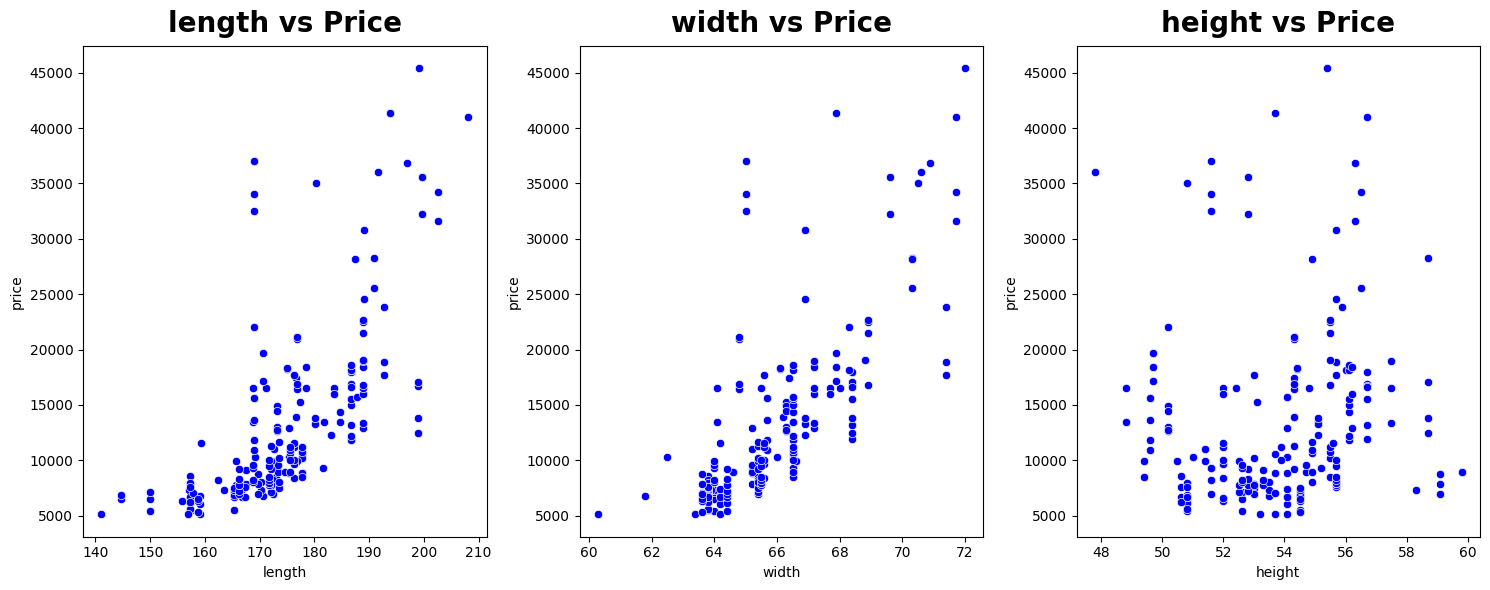

In [55]:
scatter_plot(["length","width","height"])

Insights

1. We can clearly observe that length & width features are highly correlated with the price feature.
2. So we can make an insight that with increment in length & width of the car there is an increment in price too.
3. Since CarHeight is not affecting Price We can drop this feature.

15. Visualizing "Engine Size","Bore" & "Stroke" Features

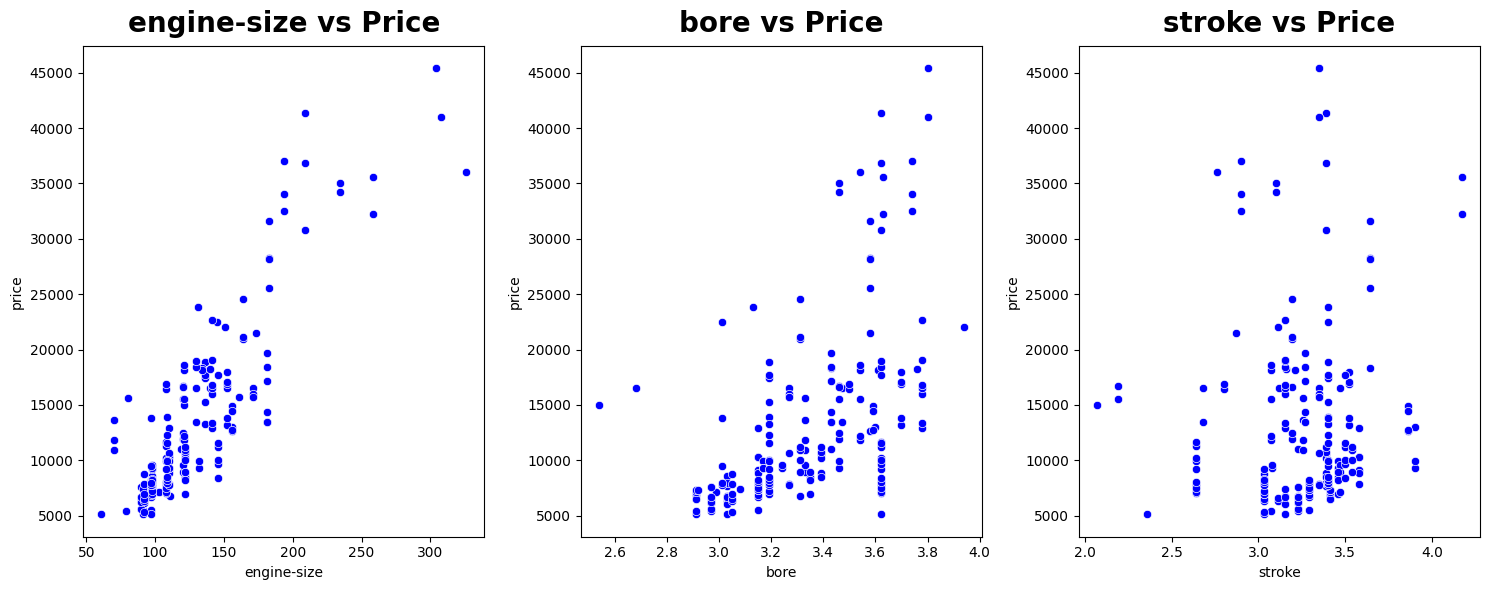

In [56]:
scatter_plot(["engine-size","bore","stroke"])

Insights

1. We can clearly observe that Engine size is highly correlated with price feature. So we can say with the increment in enginesize the price of the cars increases.
2. From Bore vs Price we can observe that the feature is not highly correlated but still there's a correlation between the features. So we can say with increment in bore the price of cars increases.
3. From Stroke vs Price we can't make any inference as the data-points are too scattered.
4. Since Stroke is not affecting Price that much. We can drop this feature.

16. Visualizing "Compreession ratio","Horesepower" & "Peakrpm" Features.

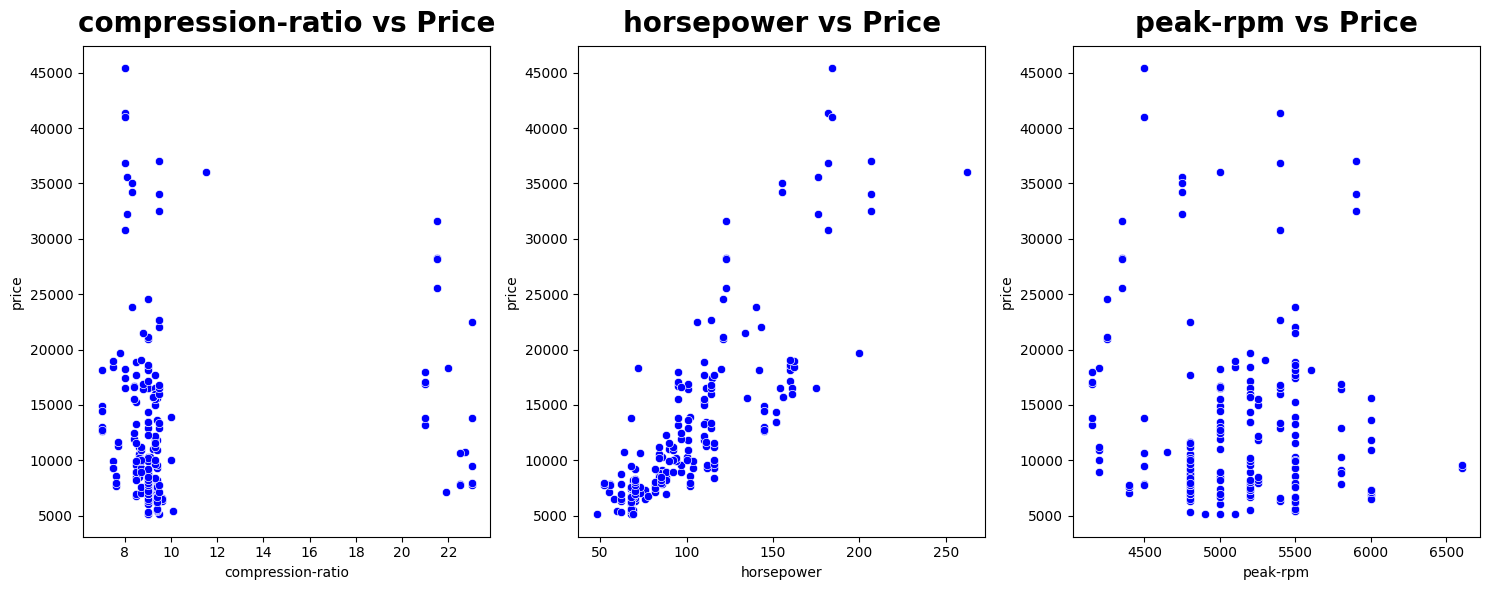

In [57]:
scatter_plot(["compression-ratio","horsepower","peak-rpm"])

Insights

1. We can clearly observe that Horsepower is highly correlated with Price. So we can say with the increment in Horsepower the price of cars also increases.
2. From Compressionratio vs Price & Peakrpm vs Price visuals we can't make any inference as the data-points are too scattered.
3. SInce Compressionratio & Peakrpm is not affecting price. So we can drop these features.

17. Visualizing "WheelBase" & "Curbweight" Features.

In [58]:
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,2,x)
        sns.scatterplot(x=col,y="price",data=car_df,color="blue")
        plt.title(f"{col} vs Price",fontweight="black",fontsize=20,pad=10)
        plt.tight_layout()
        x+=1

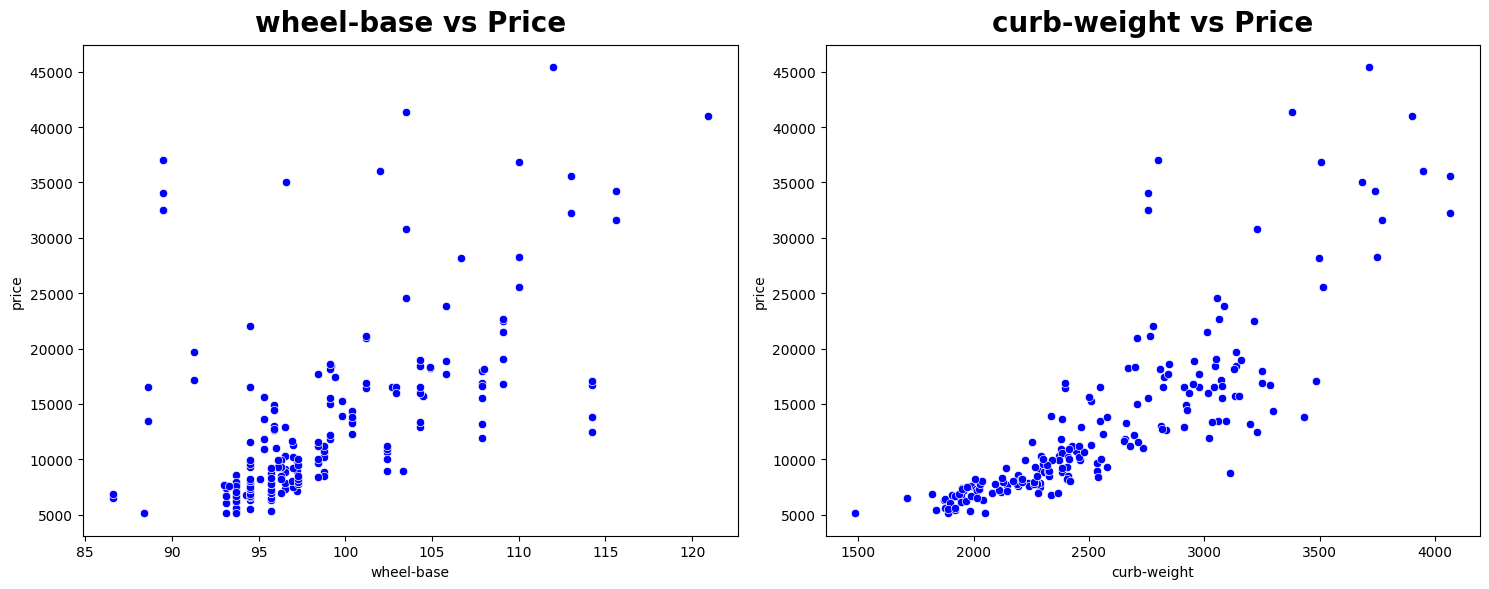

In [59]:
scatter_plot(["wheel-base","curb-weight"])

Insights

1. We can clearly observe that Curbweight is highly correlated with Price. So we can say with the increase in curbweight the price of cars increases.
2. From wheelbase vs price we can say that they are not highly correlated but still there's a correlation. So with wheel base the price of the cars also increases.

18. Visualizing "Citympg" & "Highwaympg" Features

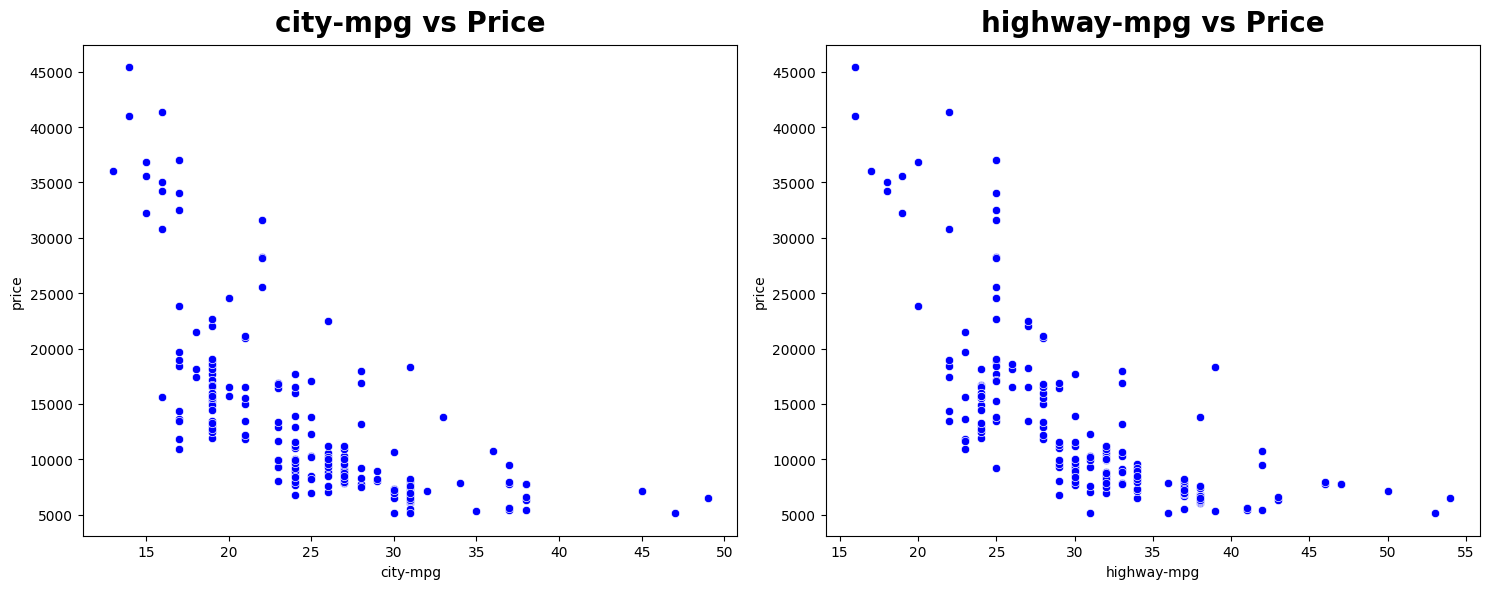

In [60]:
scatter_plot(["city-mpg","highway-mpg"])

Insights

1. We can clearly observe that Citympg & Highwaympg are having negative correlation with the price.
2. So we can say that with the increment in citympg & Highwaympg the price of the cars decreases.
So our both Citympg & Highwaympg are useful features for price prediction.

18. List of all the useful Features.

List of all the useful Categorical Features.

•	companyname
•	fuel-type
•	aspiration
•	num-of-doors
•	body-style
•	drive-wheels
•	engine-type
•	num-of-cylinders
•	fuel-system

List of all the useful numerical features.

•	wheel-base
•	length
•	width
•	curb-weight
•	engine-size
•	bore
•	horsepower
•	citympg
•	highwaympg
•	price


# **Feature Engineering**

1. Deriving New Features From "Company Name" Feature.

As we made an insight above that we can split the car company name into different price ranges.Like Low Range, Medium Range, High Range cars.

In [61]:
z = round(car_df.groupby(["CompanyName"])["price"].agg(["mean"]),2).T
z

CompanyName,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
mean,15498.33,17859.17,26118.75,6007.0,7875.44,8184.69,8916.5,34600.0,10652.88,33647.0,16503.0,9239.77,10415.67,15489.09,7963.43,31400.5,9595.0,15223.33,8541.25,9885.81,10077.5,18063.18


Note

In above output we fetched the avergae price of each individual car companies
Now we have to add this average values a new column in our datset.

In [62]:
car_df = car_df.merge(z.T,how="left",on="CompanyName")

In [63]:
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
car_df['CarsRange'] = pd.cut(car_df['mean'],bins,right=False,labels=cars_bin)
car_df.head()

,symboling,CompanyName,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,mean,CarsRange
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,15498.33,Medium
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,15498.33,Medium
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,15498.33,Medium
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,17859.17,Medium
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,17859.17,Medium


# **Data Preprocessing**

1. Creating new DataFrame with all the useful Features

In [64]:
new_df = car_df[['fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-type','num-of-cylinders','fuel-system'
             ,'wheel-base','length','width','curb-weight','engine-size','bore','horsepower','city-mpg','highway-mpg',
             'price','CarsRange']]

In [65]:
new_df.head()

,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-type,num-of-cylinders,fuel-system,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg,price,CarsRange
0,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,Medium
1,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,Medium
2,gas,std,two,hatchback,rwd,ohcv,six,mpfi,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,Medium
3,gas,std,four,sedan,fwd,ohc,four,mpfi,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,Medium
4,gas,std,four,sedan,4wd,ohc,five,mpfi,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,Medium


2. Creating Dummies Variables for all the Categorical Features.

In [66]:
new_df = pd.get_dummies(columns=["fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-type",
                                "num-of-cylinders","fuel-system","CarsRange"],data=new_df)

In [67]:
new_df.head()

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg,price,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,CarsRange_Budget,CarsRange_Medium,CarsRange_Highend
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


3. Feature Scaling of Numerical Data

In [68]:
scaler = StandardScaler()

In [69]:
num_cols = ['wheel-base','length','width','curb-weight','engine-size','bore','horsepower',
            'city-mpg','highway-mpg']

new_df[num_cols] = scaler.fit_transform(new_df[num_cols])

In [70]:
new_df.head()

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg,price,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,CarsRange_Budget,CarsRange_Medium,CarsRange_Highend
0,-1.685107,-0.439409,-0.853460,-0.014858,0.075389,0.520966,0.203823,-0.652249,-0.542288,13495.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,-1.685107,-0.439409,-0.853460,-0.014858,0.075389,0.520966,0.203823,-0.652249,-0.542288,16500.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,-0.710103,-0.244152,-0.185597,0.518080,0.606234,-2.433363,1.357486,-0.964397,-0.689386,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.165748,0.195176,0.148335,-0.423766,-0.431327,-0.526138,-0.037641,-0.184027,-0.100993,13950.0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.099646,0.195176,0.243744,0.520017,0.220165,-0.526138,0.311141,-1.120471,-1.277779,17450.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


4. Selecting Features & Labels for Model Training & Testing

In [71]:
x = new_df.drop(columns=["price"])
y = new_df["price"]

In [72]:
x.shape

(201, 47)

In [73]:
y.shape

(201,)

5. Splitting Data for Model Traning & Testing

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [75]:
print("x_train - >  ",x_train.shape)
print("x_test - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

x_train - >   (160, 47)
x_test - >   (41, 47)
y_train - >   (160,)
y_test - >   (41,)


# **Model Building**

In [76]:
training_score = []
testing_score = []
mse_score = []
mae_score = []
rmse_score=[]

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    mse = mean_squared_error(y_test, x_test_pred)
    mae = mean_absolute_error(y_test, x_test_pred)
    training_score.append(a)
    testing_score.append(b)
    mse_score.append(mse)
    mae_score.append(mae)
    rmse = np.sqrt(mse)
    rmse_score.append(rmse)
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)
    print(f"MSE of {model} model on Testing Data is:", mse)
    print(f"MAE of {model} model on Testing Data is:", mae)
    print(f"RMSE of {model} model on Testing Data is:", rmse)

# 1. Linear-Regression Model

In [78]:
model_prediction(LinearRegression())

r2_Score of LinearRegression() model on Training Data is: 95.34819826210064
r2_Score of LinearRegression() model on Testing Data is: 89.45102352281089
MSE of LinearRegression() model on Testing Data is: 12906332.31309279
MAE of LinearRegression() model on Testing Data is: 2244.4587605870183
RMSE of LinearRegression() model on Testing Data is: 3592.538421936889


# 2. Decision-Tree-Regressor Model

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
model_prediction(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on Training Data is: 99.89831862870213
r2_Score of DecisionTreeRegressor() model on Testing Data is: 93.68857095799835
MSE of DecisionTreeRegressor() model on Testing Data is: 7721829.768292683
MAE of DecisionTreeRegressor() model on Testing Data is: 1804.878048780488
RMSE of DecisionTreeRegressor() model on Testing Data is: 2778.818052390743


# 3. Random-Forest-Regressor Model

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
model_prediction(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Training Data is: 98.83057707774141
r2_Score of RandomForestRegressor() model on Testing Data is: 93.57640117325882
MSE of RandomForestRegressor() model on Testing Data is: 7859065.880295305
MAE of RandomForestRegressor() model on Testing Data is: 1765.1877642276422
RMSE of RandomForestRegressor() model on Testing Data is: 2803.4025540930265


# 4. XGBRegressor Model

In [81]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
model_prediction(XGBRegressor())

r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model on Training Data is: 99.89821544127868
r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
      

# **All Model Performance Comparison**

In [82]:
models = ["Linear Regression","Decision Tree","Random Forest","XGBoost"]

In [83]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score,
                   "RMSE":rmse_score})

In [84]:
df

,Algorithms,Training Score,Testing Score,RMSE
0,Linear Regression,95.348198,89.451024,3592.538422
1,Decision Tree,99.898319,93.688571,2778.818052
2,Random Forest,98.830577,93.576401,2803.402554
3,XGBoost,99.898215,94.520418,2589.226066


Plotting above results using column-bar chart.

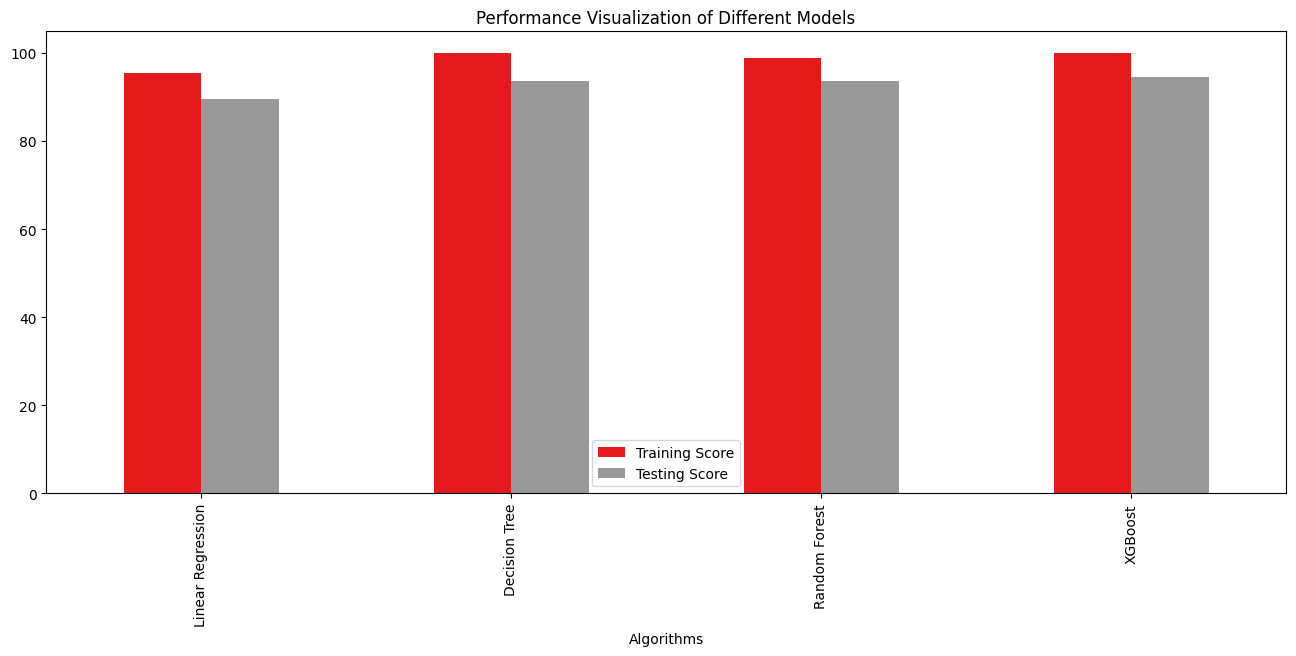

In [91]:
df.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

Observation
1.  Highest performance was give by XGBoost Model around 94.5% with least RMSE value. 
2. But Decision tree and Random Forest Model performance were also good.
3. So we can use any of these three Models for predicting the price of car in future.

# **Final Model**

We are selecting the XGBoost model and fine tuning the parameters to check if it results in any performance improvement

In [96]:
training_score = []
testing_score = []
mse_score = []
mae_score = []
rmse_score=[]

In [100]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    mse = mean_squared_error(y_test, x_test_pred)
    mae = mean_absolute_error(y_test, x_test_pred)
    training_score.append(a)
    testing_score.append(b)
    mse_score.append(mse)
    mae_score.append(mae)
    rmse = np.sqrt(mse)
    rmse_score.append(rmse)
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)
    print(f"MSE of {model} model on Testing Data is:", mse)
    print(f"MAE of {model} model on Testing Data is:", mae)
    print(f"RMSE of {model} model on Testing Data is:", rmse)

In [99]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
model_prediction(XGBRegressor())

r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model on Training Data is: 99.89821544127868
r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
      

In [101]:
final_df = pd.DataFrame({
    "Final Model": ["XGBoost"],
    "Training Score": training_score,
    "Testing Score": testing_score,
    "MSE": mse_score,
    "MAE": mae_score,
    "RMSE": rmse_score
})
final_df

,Final Model,Training Score,Testing Score,MSE,MAE,RMSE
0,XGBoost,99.898215,94.520418,6.704092e+06,1514.708127,2589.226066


# Importance of different features

Creating a dataframe containing the features names and its corresponding coefficient values

In [104]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train, y_train)

feature_importances = xgb_model.feature_importances_ 
cols = x_train.columns

lm_model_df = pd.DataFrame(list(zip(cols, feature_importances)))
lm_model_df.columns = ['Feature', 'Importance']


Only selecting the features whose coeficient values are greater than 0

In [106]:
lm_model_df = lm_model_df[lm_model_df['Importance']>0]

 Sorted the created dataframe containing the features names and its corresponding coefficient values in descending order inorder to get the top coefficients

In [107]:
lm_model_df.sort_values(by='Importance',ascending=False).reset_index(drop=True)

,Feature,Importance
0,CarsRange_Highend,0.410350
1,highway-mpg,0.158147
2,drive-wheels_rwd,0.135046
3,engine-size,0.122358
4,curb-weight,0.046649
5,CarsRange_Budget,0.028234
6,engine-type_ohc,0.025763
7,width,0.016958
8,horsepower,0.015032
9,drive-wheels_fwd,0.007826


We see that the above list of features sorted in descending order gives us the feature importance while prediction.

# **Conclusion**

Car Price Prediction with Machine Learning.

Key-Points
1. First we did the Basic Understanding of Data
2. Then we performed Data Cleaning to make the raw data more useable while analysis.
3. Then we performed Exploratory Data Analysis to generate insights from the data.
4. Then we performed Data Preprocessing to make data suitable for model training & testing.
5. Then we trainined our model using different Machine Learning Algorithms.
6. In the end we came with 94.5% accuracy which was given by XGBoost Model.The accuracy of the model in predicting the car price is measured with RMSE, RMSE of test dataset is 2589. So we can use this model for predicting price of a car in future.